<Axes: xlabel='git_committed_date'>

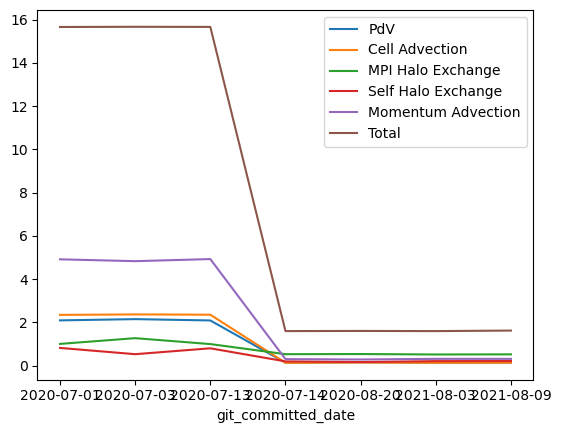

In [37]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("clover_random_test.csv")
df.head()
int_cols = {"PdV":'mean', "Cell Advection":'mean', "MPI Halo Exchange":'mean', "Self Halo Exchange":'mean', "Momentum Advection":'mean', "Total":'mean'}
# print(df.groupby('git_committed_date')["Total"].mean())
sorted_df = df.groupby('git_committed_date').agg(int_cols)
commit_dates = pd.to_datetime(sorted_df.index.to_list()).strftime("%b %d, %Y")
sorted_df.plot()

In [40]:

for i in sorted_df.columns:
    col_name = i
    print(col_name)

PdV
Cell Advection
MPI Halo Exchange
Self Halo Exchange
Momentum Advection
Total


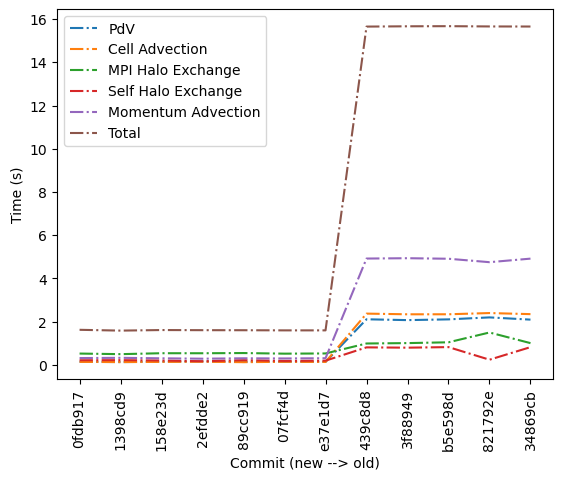

In [2]:
# from ipywidgets import *
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline 

# get_ipython().run_line_magic('matplotlib', 'inline')
def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)



sh_hash = [substring[:7] for substring in df["git_hash"]]
for col in ["PdV", "Cell Advection", "MPI Halo Exchange", "Self Halo Exchange", "Momentum Advection", "Total"]:
    plt.plot(sh_hash, df[col], label=col, linestyle='dashdot')
plt.xticks(rotation=90)
plt.xlabel("Commit (new --> old)")
plt.ylabel("Time (s)")
plt.legend()

binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

In [7]:
def create_git_comapre_link(df, row1, row2):
    return "https://github.com/" + df.iloc[row1]["git_repo_name"] + "/compare/" + df.iloc[row1]["git_hash"][:7] + ".." + df.iloc[row2]["git_hash"][:7]

# https://github.com/UK-MAC/CloverLeaf_ref/compare/e37e1d7..439c8d8 (old .. new)
create_git_comapre_link(df, 7,6)

'https://github.com/UK-MAC/CloverLeaf_ref/compare/439c8d8..e37e1d7'

In [1]:
import altair as alt

ModuleNotFoundError: No module named 'altair'

In [67]:
import sqlite3
import pandas as pd
import numpy as np
# Create your connection.
cnx = sqlite3.connect('clover_perf_runner_test_run.db')
str_query = "SELECT * FROM TABLENAME WHERE total != 'None'"
df = pd.read_sql_query(str_query, cnx)
for column in df.columns:
    if column == 'testname' or column.startswith("git_"):
        continue
    df[column] = pd.to_numeric(df[column].fillna(value=np.nan), errors='coerce')
# df.describe(include=[np.number])
# df.select_dtypes(include='number').columns.to_list()
df.select_dtypes(include='number').std() > 0.5
# df[df.total>10]
# another = df.select_dtypes(include='number').std() > 1
# df[another[another].index]
# list(another[another].index)

version               False
Task_Count            False
Thread_Count          False
x_cells                True
y_cells                True
xmin                  False
ymin                  False
xmax                  False
ymax                  False
initial_timestep      False
timestep_rise         False
max_timestep          False
end_step              False
timestep              False
ideal_gas             False
viscosity             False
pdv                    True
revert                False
acceleration          False
fluxes                False
cell_advection         True
momentum_advection     True
reset                 False
summary               False
visit                 False
tile_halo_exchange    False
self_halo_exchange    False
mpi_halo_exchange     False
total                  True
the_rest              False
end_time              False
dtype: bool

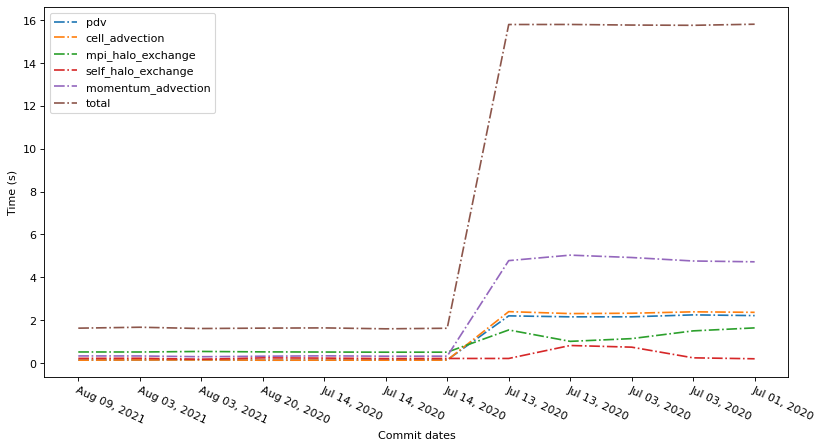

In [49]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

figure(figsize=(12, 6), dpi=80)

sh_hash = [substring[:7] for substring in df["git_hash"]]
commit_dates = pd.to_datetime(df["git_committed_date"]).dt.strftime("%b %d, %Y")
for col in ["pdv", "cell_advection", "mpi_halo_exchange", "self_halo_exchange", "momentum_advection", "total"]:
    plt.plot(sh_hash, pd.to_numeric(df[col]), label=col, linestyle='dashdot')
plt.xticks(sh_hash, commit_dates, rotation=-25, ha="left", rotation_mode="anchor")
# plt.xticklabels(commit_dates)
plt.xlabel("Commit dates")
plt.ylabel("Time (s)")
plt.legend()


plt.show()

In [6]:
from IPython.display import IFrame
comp_url = create_git_comapre_link(df, 7,6)
# comp_url = "https://www.google.com"
print(comp_url)
# IFrame("https://github.com/UK-MAC/CloverLeaf_ref/compare/439c8d8..e37e1d7", 900,500)

https://github.com/UK-MAC/CloverLeaf_ref/compare/439c8d8..e37e1d7


In [28]:
from datetime import datetime

print(df["git_committed_date"][1])
datetime_object = datetime.strptime(df["git_committed_date"][1], '%Y-%m-%d').strftime("%B %d, %Y")
print(datetime_object)
pd.to_datetime(df["git_committed_date"])
# print(df["git_committed_date"].strftime("%B %d, %Y"))

commit_dates = pd.to_datetime(df["git_committed_date"]).dt.strftime("%B %d, %Y")
print(commit_dates)

2021-08-03
August 03, 2021
0     August 09, 2021
1     August 03, 2021
2     August 03, 2021
3     August 20, 2020
4       July 14, 2020
5       July 14, 2020
6       July 14, 2020
7       July 13, 2020
8       July 13, 2020
9       July 03, 2020
10      July 03, 2020
11      July 01, 2020
Name: git_committed_date, dtype: object


In [82]:
import pickle
def get_var_occurance(tracked_var, tracked_file):
    f_list = list()
    for gh in df["git_hash"]:
        with open(gh + '.pickle', 'rb') as handle:
            b = pickle.load(handle)
            val = 0
            if tracked_var in b:
                if tracked_file in b[tracked_var]:
                    val = len(b[tracked_var][tracked_file])
            f_list.append(val)
            # print(b[tracked_var]['kernels/field_summary_kernel_c.c'])
    # print(f_list)
    return f_list

def get_var_occurance_accross_files(tracked_var):
    f_list = dict()
    for gh in df["git_hash"]:
        with open(gh + '.pickle', 'rb') as handle:
            b = pickle.load(handle)
            val = 0
            if tracked_var in b:
                for tracked_file in b[tracked_var]:
                    if tracked_file not in f_list:
                        f_list[tracked_file] = get_var_occurance(tracked_var, tracked_file)
    # print(f_list)
    return f_list
get_var_occurance_accross_files("#pragma omp simd")

{'kernels/update_halo_kernel_c.c': [60,
  60,
  60,
  60,
  59,
  59,
  59,
  59,
  59,
  59,
  59,
  59],
 'kernels/viscosity_kernel_c.c': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'kernels/revert_kernel_c.c': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'kernels/accelerate_kernel_c.c': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'kernels/advec_cell_kernel_c.c': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 'kernels/pack_kernel_c.c': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 'kernels/generate_chunk_kernel_c.c': [4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5],
 'kernels/flux_calc_kernel_c.c': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'kernels/PdV_kernel_c.c': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 'kernels/reset_field_kernel_c.c': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 'kernels/advec_mom_kernel_c.c': [12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12],
 'kernels/initialise_chunk_kernel_c.c': [3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2],
 'kernels/field_summary_kernel_c.c': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 

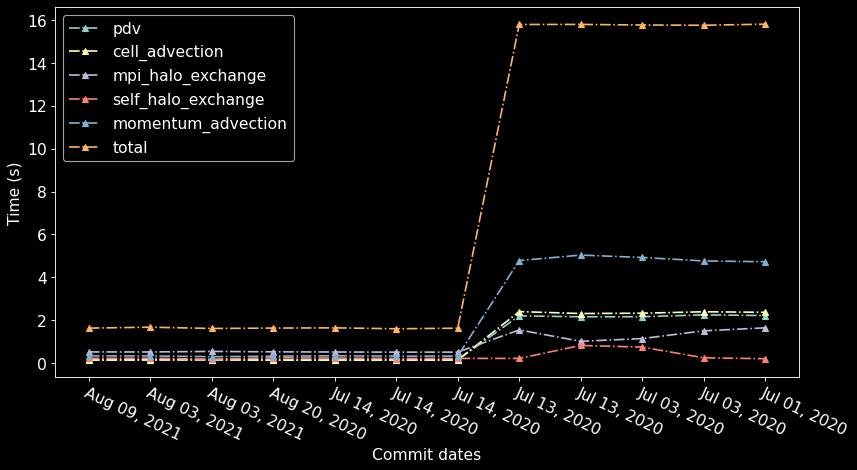

In [121]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 
plt.style.use('dark_background')

tracked_var = "#pragma omp simd"
tracked_file = 'kernels/field_summary_kernel_c.c'
f_list = get_var_occurance(tracked_var, tracked_file)
figure(figsize=(12, 6), dpi=80)

sh_hash = [substring[:7] for substring in df["git_hash"]]
commit_dates = pd.to_datetime(df["git_committed_date"]).dt.strftime("%b %d, %Y")
for col in ["pdv", "cell_advection", "mpi_halo_exchange", "self_halo_exchange", "momentum_advection", "total"]:
    plt.plot(sh_hash, pd.to_numeric(df[col]), marker='^', label=col, linestyle='dashdot')
# plt.scatter(sh_hash, f_list, s=100, c='#000000', marker='.', zorder=2)
plt.xticks(sh_hash, commit_dates, rotation=-25, ha="left", rotation_mode="anchor")
# plt.xticklabels(commit_dates)
plt.xlabel("Commit dates")
plt.ylabel("Time (s)")
plt.legend()
plt.rcParams.update({'font.size': 14})

plt.show()

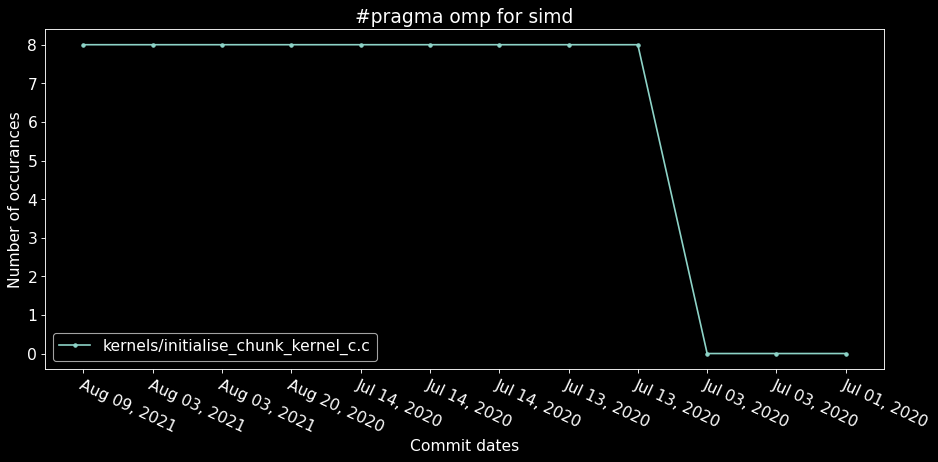

In [120]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 
plt.style.use('dark_background')
def is_val_changed(c_list):
    for indx, val in enumerate(c_list):
        if indx > 0 and val - c_list[indx-1] != 0:
            return True
    return False

tracked_var = "#pragma omp for simd"
tracked_file = 'kernels/field_summary_kernel_c.c'
f_dict = get_var_occurance_accross_files(tracked_var)
f_list = get_var_occurance(tracked_var, tracked_file)
figure(figsize=(12, 6), dpi=80)

sh_hash = [substring[:7] for substring in df["git_hash"]]
commit_dates = pd.to_datetime(df["git_committed_date"]).dt.strftime("%b %d, %Y")
ignore_list = ["kernels/update_halo_kernel_c.c"]
for files in f_dict:
    if is_val_changed(f_dict[files]) and files not in ignore_list:
        # print(f_dict[files])
        plt.plot(sh_hash, f_dict[files], marker='.', zorder=2, label=files)
plt.xticks(sh_hash, commit_dates, rotation=-25, ha="left", rotation_mode="anchor")
# plt.xticklabels(commit_dates)
plt.xlabel("Commit dates")
plt.ylabel("Number of occurances")
plt.legend(loc="lower left")
plt.title(tracked_var)
plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd
my_df = pd.DataFrame({"first-left":[1,2,45,53],
                      "dates":[521,82,945,513],
                      "third":[61,72,245,563]
                      })
second_df = pd.DataFrame({"first":[45,2,1,53,45,2,1,53],
                      "dates":[2556,26,737,348,-1,-1,-1,-1],
                      "third":[61,72,245,563,0,0,0,0]
                      })
list(my_df)
df = pd.merge(my_df, second_df, left_on="first-left", right_on="first", how="outer")
updated_dates = df[df.dates_y != -1]
updated_dates[updated_dates["first"] == 1]


,first-left,dates_x,third_x,first,dates_y,third_y
0,1,521,61,1,737,245


In [11]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

gitFig = go.Figure()
all_var_list = [{'var_name': 'define', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/update_halo_kernel_c.c', 'occ': 80},{'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/update_halo_kernel_c.c', 'occ': 121}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/viscosity_kernel_c.c', 'occ': 3}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/field_summary_kernel_c.c', 'occ': 2}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/revert_kernel_c.c', 'occ': 5}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/calc_dt_kernel_c.c', 'occ': 3}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/accelerate_kernel_c.c', 'occ': 3}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/ideal_gas_kernel_c.c', 'occ': 2}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/advec_cell_kernel_c.c', 'occ': 15}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/pack_kernel_c.c', 'occ': 12}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/generate_chunk_kernel_c.c', 'occ': 10}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/flux_calc_kernel_c.c', 'occ': 5}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/PdV_kernel_c.c', 'occ': 5}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/reset_field_kernel_c.c', 'occ': 9}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/advec_mom_kernel_c.c', 'occ': 27}, {'var_name': 'pragma', 'hash': 'e37e1d7aab99070a65094e784721b4d05fb86444', 'file_name': 'kernels/initialise_chunk_kernel_c.c', 'occ': 15}]

all_var_df = pd.DataFrame(all_var_list)
# all_var_df.head()
# code_senese_df = pd.merge(all_var_df, git_nodes_df, left_on="hash", right_on="sha", how="outer")
# code_senese_df["formatted_date"] = pd.to_datetime(code_senese_df['date']).dt.strftime("%b-%d,%Y(%H:%M:%S)")

dl = 'Jul-14,2020(08:44:25)','Dec-24,2022(14:14:59)','Dec-24,2022(14:14:59)','Aug-09,2021(12:23:14)','Aug-03,2021(08:49:14)','Aug-03,2021(08:49:14)','Aug-02,2021(18:40:45)','Aug-20,2020(14:20:55)','Jul-14,2020(09:16:46)', 'Jul-14,2020(08:13:22)'
code_senese_df = {'formatted_date':dl, "occ":[1,1,1,1,1,1,1,1,1,1]}
print(len(code_senese_df["formatted_date"]))
print(len(code_senese_df["occ"]))
gitFig.add_trace(go.Bar(x=code_senese_df["formatted_date"], y=code_senese_df['occ'],
                                    # mode='markers',
                                    marker = {'color' : 'black'},
                                    name='hello')
                            )
gitFig.show()

10
10


In [1]:
import os
file_name = "kernels/advec_mom_kernel_c.c"
print(os.path.splitext(file_name)[1])


.c
